In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import pandas_profiling as pp
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgbm

In [21]:
heart_dataset = pd.read_csv("dataset/heart_failure_clinical_records_dataset.csv")

In [22]:
heart_dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [23]:
heart_dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [24]:
y = heart_dataset["DEATH_EVENT"]
X =  heart_dataset.drop("DEATH_EVENT", axis = 1)

In [25]:
X.shape

(299, 12)

In [26]:
X.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000


In [27]:
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


Observations:
    • There are no missing values.
    • data points 299 and 13 features
    • The dataset is imbalanced
    • Categorical features (anaemia, diabetes, high_blood_pressure, sex, smoking).
    • discrete features (age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time)
    • All features are numerical
        

In [33]:
X.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608


In [46]:
px.histogram(heart_dataset, x = "time", color = "DEATH_EVENT", title = "Follow-up period - in days")

In [52]:
px.histogram(heart_dataset, x = "ejection_fraction", color = "DEATH_EVENT", title = "Follow-up period - in days")

Text(0.5, 1.0, 'creatinine phosphokinase')

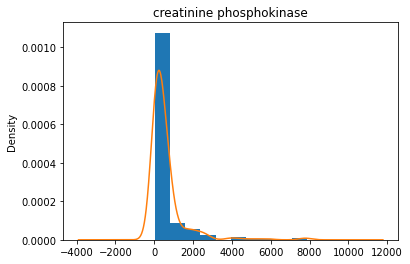

In [59]:
fig, ax = plt.subplots(figsize = (6,4))
X["creatinine_phosphokinase"].plot(kind = "hist", density = True)
X["creatinine_phosphokinase"].plot(kind = "kde")
ax.set_title("creatinine phosphokinase")

Text(0.5, 1.0, 'age')

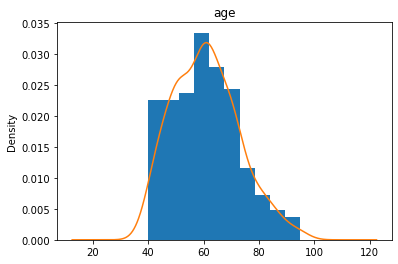

In [60]:
fig, ax = plt.subplots(figsize = (6,4))
X["age"].plot(kind = "hist", density = True)
X["age"].plot(kind = "kde")
ax.set_title("age")

Text(0.5, 1.0, 'time')

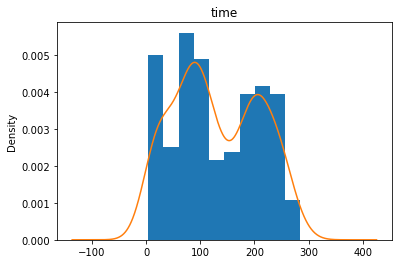

In [61]:
fig, ax = plt.subplots(figsize = (6,4))
X["time"].plot(kind = "hist", density = True)
X["time"].plot(kind = "kde")
ax.set_title("time")

Observations:
    • The longer the follow up days the smaller the number of death.
    • More people survived when there ejection fraction is around the average.
    • No correlation

In [66]:
to_scale = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
standardScaler = StandardScaler()
X[to_scale] = standardScaler.fit_transform(X[to_scale])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 1)

In [74]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfcResult = rfc.predict(X_test)
print(accuracy_score(y_test, rfcResult))
print(classification_report(y_test, rfcResult))
print(confusion_matrix(y_test, rfcResult))

0.9333333333333333
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.86      0.86      0.86        14

    accuracy                           0.93        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.93      0.93      0.93        60

[[44  2]
 [ 2 12]]


In [75]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knnResult = knn.predict(X_test)
print(accuracy_score(y_test, knnResult))
print(classification_report(y_test, knnResult))
print(confusion_matrix(y_test, knnResult))

0.85
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        46
           1       0.78      0.50      0.61        14

    accuracy                           0.85        60
   macro avg       0.82      0.73      0.76        60
weighted avg       0.84      0.85      0.84        60

[[44  2]
 [ 7  7]]


In [76]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtcResult = dtc.predict(X_test)
print(accuracy_score(y_test, dtcResult))
print(classification_report(y_test, dtcResult))
print(confusion_matrix(y_test, dtcResult))

0.7666666666666667
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        46
           1       0.50      0.79      0.61        14

    accuracy                           0.77        60
   macro avg       0.71      0.77      0.72        60
weighted avg       0.82      0.77      0.78        60

[[35 11]
 [ 3 11]]


In [77]:
lg = lgbm.LGBMClassifier()
lg.fit(X_train, y_train)
lgResult = lg.predict(X_test)
print(accuracy_score(y_test, lgResult))
print(classification_report(y_test, lgResult))
print(confusion_matrix(y_test, lgResult))

0.8666666666666667
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        46
           1       0.71      0.71      0.71        14

    accuracy                           0.87        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.87      0.87      0.87        60

[[42  4]
 [ 4 10]]


RandomForestClassifier performed best while KNeighborsClassifier has been identified as performing worst because it was only able to predict 50% of deaths.
• Feature selection maybe import in improving the other models given that RandomForestClassifier performs feature selection.